### instal additional package
sesudah diinsatal mohon untuk di-restart kernel ya

In [1]:
# sesudah di-run cell pertama, langsung di-restart kernel ya
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
!pip install pyyaml==5.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     | 21.9 MB 136 kB/s
     |████████████████████████████████| 596 kB 4.8 MB/s 
     |████████████████████████████████| 102 kB 69.7 MB/s 
     |████████████████████████████████| 690 kB 60.9 MB/s 
     |████████████████████████████████| 4.7 MB 61.4 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 812 kB 66.8 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=261257 sha256=6b8f421c2e1118b57edf20c60468eda20899d76567174fb998216f5d905de9d8
  Stored in directory: /tmp/pip-ephem-wheel-cache-ok8znsb5/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=97b23444a145d83092ffcea51c7a0f36467dbf1623760e38a0650f00d6092301
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940

### import packages

In [2]:
import matplotlib.pyplot as plt 
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import numpy as np 
import math 
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline 

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



### import data dari google drive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
#@title 
file_path = "/content/gdrive/MyDrive/dts_project/dataset/superstore_raw_data.csv" #@param {type:'string'}
print(f"Used File Path: {file_path}")

Used File Path: /content/gdrive/MyDrive/dts_project/dataset/superstore_raw_data.csv


In [7]:
df = pd.read_csv(file_path)
df.head()

Row_ID        Order_ID  Order_Date   Ship_Date       Ship_Mode Customer_ID  \
0       1  CA-2016-152156  2016-11-08  2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156  2016-11-08  2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688  2016-06-12  2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966  2015-10-11  2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966  2015-10-11  2015-10-18  Standard Class    SO-20335   

     Customer_Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal_Code  Region       Product_ID         Category Sub_Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product_Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

### import data dari google bigquery

In [ ]:
# from google.colab import auth
# auth.authenticate_user()
# print('Authenticated')

In [ ]:
# %%bigquery --project golden-resolver-357006 df
# SELECT
#   s.*
# FROM 
#   `uprak.super_store_mat` s
# ORDER BY
#   s.Row_ID

In [ ]:
# df.head()

### data profiling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9994 non-null   int64  
 1   Order_ID       9994 non-null   object 
 2   Order_Date     9994 non-null   object 
 3   Ship_Date      9994 non-null   object 
 4   Ship_Mode      9994 non-null   object 
 5   Customer_ID    9994 non-null   object 
 6   Customer_Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal_Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product_ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub_Category   9994 non-null   object 
 16  Product_Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
df.describe()

Row_ID   Postal_Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500000  55190.379428    229.858001     3.789574     0.156203   
std    2885.163629  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000

In [ ]:
profiling = ProfileReport(df, title='Superstore', html={'style':{'full_width':True}})
profiling.to_file("profiling.html")
profiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### pre-process data

In [ ]:
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State',
       'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category',
       'Product_Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [ ]:
# drop kolom yang tidak digunakan

df.drop('Row_ID',axis=1,inplace=True)
df.drop('Order_ID',axis=1,inplace=True)
df.drop('Country',axis=1,inplace=True)

In [ ]:
df.columns

Index(['Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID', 'Customer_Name',
       'Segment', 'City', 'State', 'Postal_Code', 'Region', 'Product_ID',
       'Category', 'Sub_Category', 'Product_Name', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

In [ ]:
df.isnull().sum()

Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_ID      0
Customer_Name    0
Segment          0
City             0
State            0
Postal_Code      0
Region           0
Product_ID       0
Category         0
Sub_Category     0
Product_Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

tidak ada data yang null, sehingga bisa langsung diolah

### visualisasi category analysis

Text(0.5, 1.0, 'tipe jasa pengiriman terbanyak')

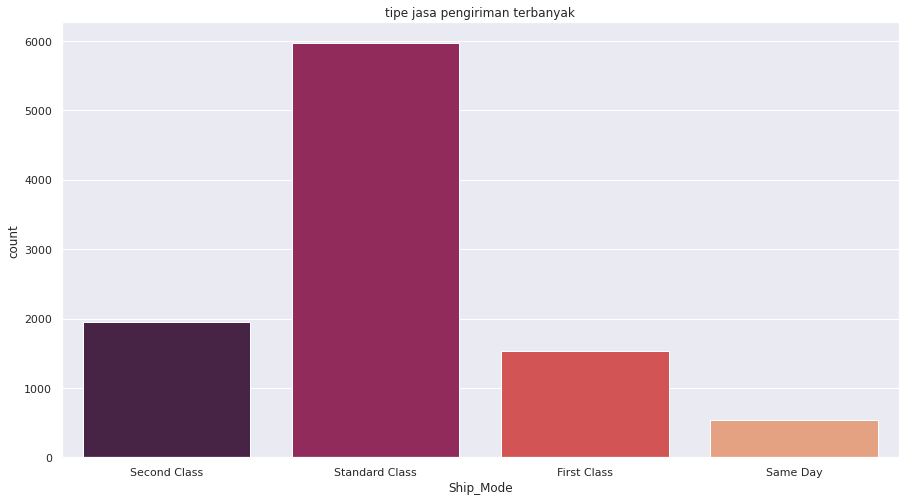

In [ ]:
sns.countplot(x=df['Ship_Mode'],palette='rocket')
plt.title("tipe jasa pengiriman terbanyak")

customer lebih suka pengiriman melalui Standard Class, mungkin karena harganya terjangkau

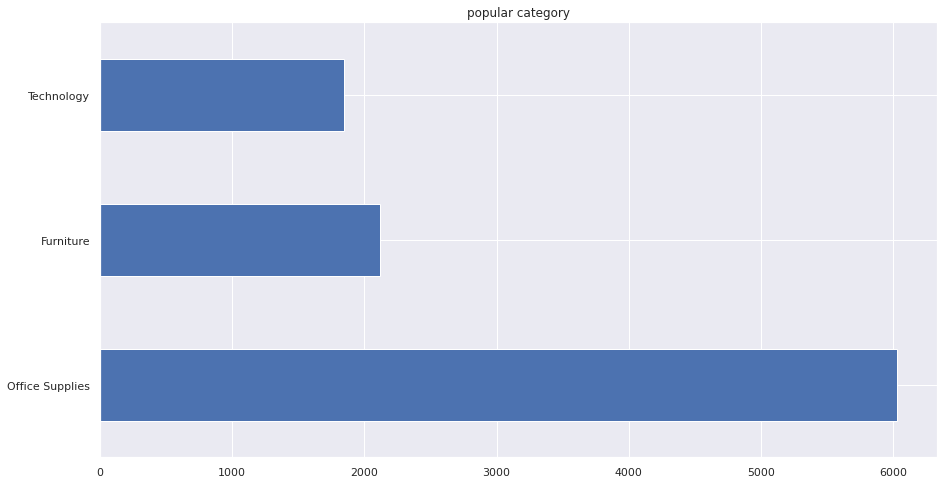

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})

df['Category'].value_counts().plot(kind='barh',title='popular category')

berdasar gambar diatas, kategori Office Supplies paling sering muncul (dipesan) daripada kategori lainnya

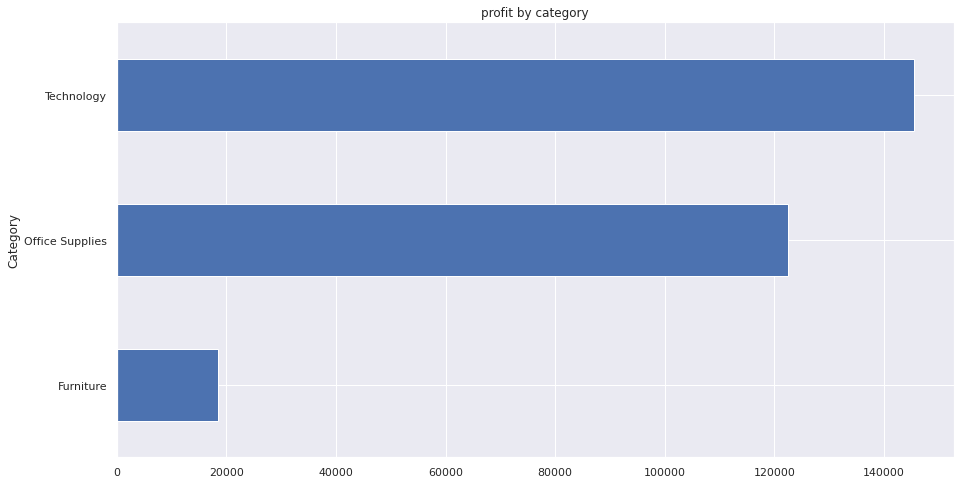

In [ ]:
df.groupby('Category')['Profit'].sum().plot(kind='barh',title='profit by category')

meskipun Office Supplies merupakan Category yang sering dipesan, <br>
namun Technology lah yang memiliki profit paling tinggi

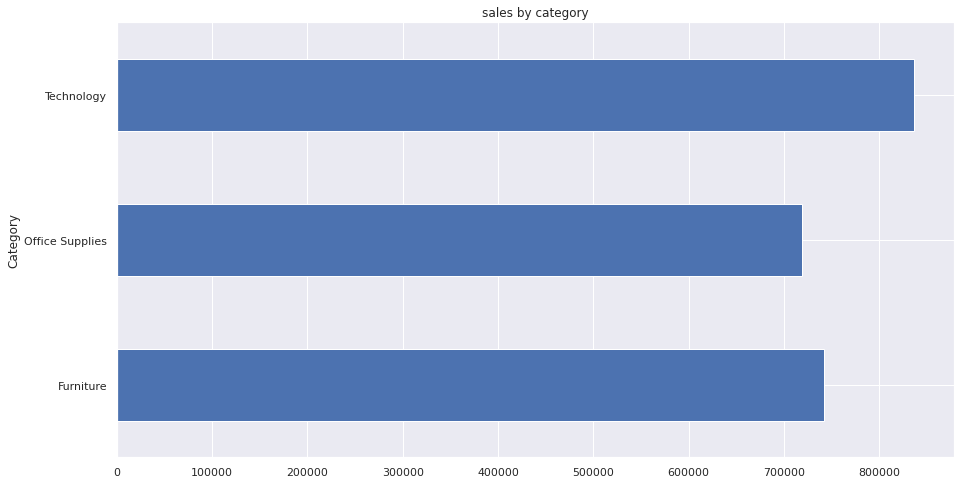

In [ ]:
df.groupby('Category')['Sales'].sum().plot(kind='barh',title='sales by category')

1. Office Supplies sering dipesan, serta memiliki Sales yang paling rendah & Profit kelas menengah <br>(item yang dijual banyak, dengan harga murah, profit kelas menengah)<br>
<br>
2. Technology jarang dipesan, serta memiliki Sales yang Paling Tinggi & Profit yang tinggi <br>(item yang dijual sedikit, dengan harga mahal, profit juga tinggi)<br>
<br>
3. Furniture juga jarang dipesan (tidak se-jarang Technology), namun memiliki Profit yang terkecil & Sales lebih tinggi daripada Office Supplies <br>(item yang dijual sedikit, dengan harga mahal, namun profit juga sedikit)

In [ ]:
df.columns

Index(['Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID', 'Customer_Name',
       'Segment', 'City', 'State', 'Postal_Code', 'Region', 'Product_ID',
       'Category', 'Sub_Category', 'Product_Name', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

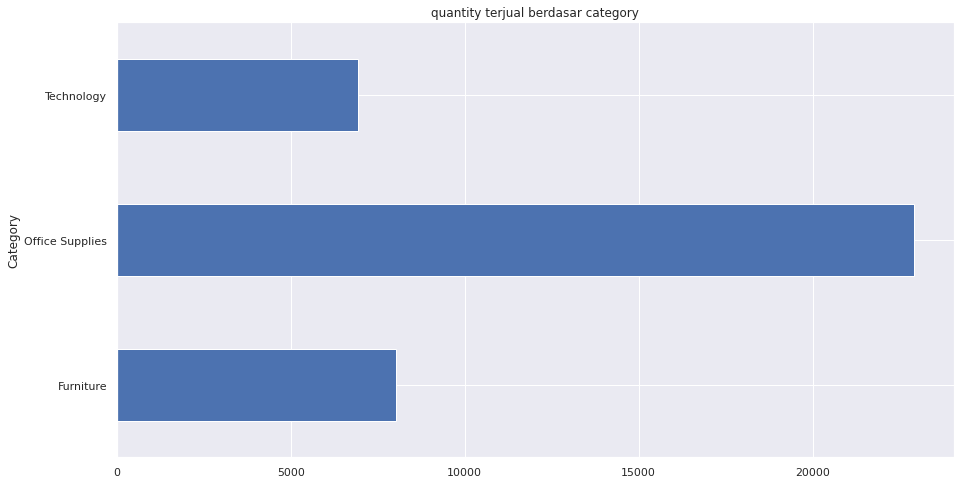

In [ ]:
df.groupby('Category')['Quantity'].sum().plot(kind='barh',title='quantity terjual berdasar category')

lagi-lagi Office Supplies mendominasi dari segi sering muncul (popular) dan quantity

Text(0.5, 1.0, 'segment customer terbanyak')

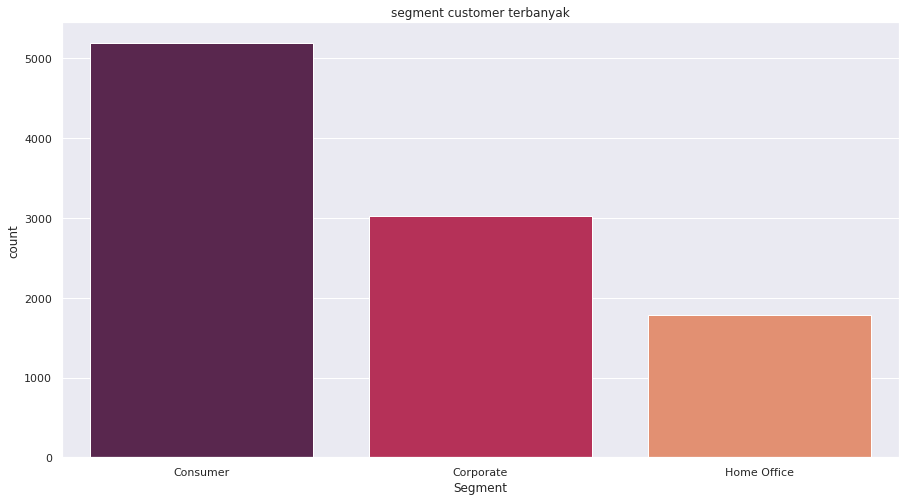

In [ ]:
sns.countplot(x=df['Segment'],palette='rocket')
plt.title("segment customer terbanyak")

Segment terbanyak (paling sering muncul) dari customer berasl dari Consumer (orang-orang biasa)

### visualisasi region analysis

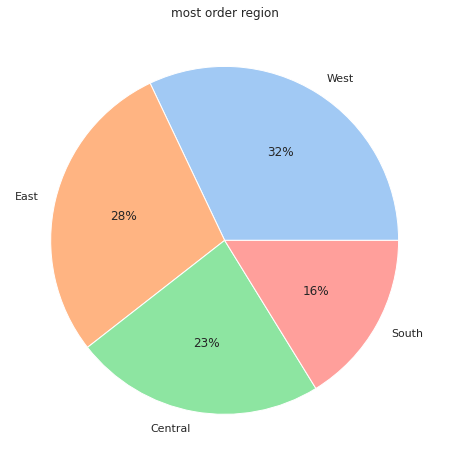

In [ ]:
colors = sns.color_palette('pastel')[0:]
plt.pie(df['Region'].value_counts().values, labels = df['Region'].value_counts().index, colors = colors, autopct='%.0f%%')
plt.title("most order region")
plt.show()

Regioan West memiliki sumbangsih terbesar terhadap order (pemesan)

In [ ]:
labels = df.groupby('Region')['Profit'].sum().index
values = df.groupby('Region')['Profit'].sum().values

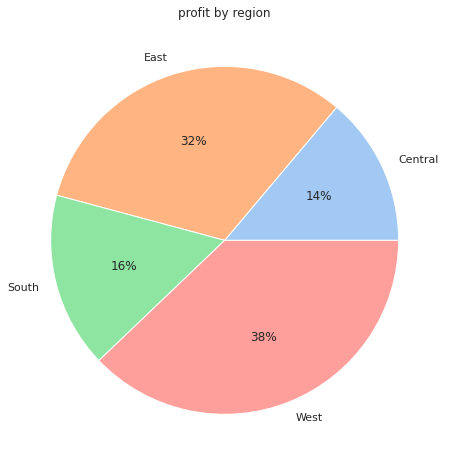

In [ ]:
colors = sns.color_palette('pastel')[0:4]
plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("profit by region")
plt.show()

profit Region West & Region East berbanding lurus dengan jumlah pesanan<br>
namun profit Region South & Region West berbanding terbalik dengan jumlah pesanan<br>
Regional Central = jumlah pesanan 23% dan profit 14%<br>
Regional South  = jumlah pesanan 16% dan profit 16%

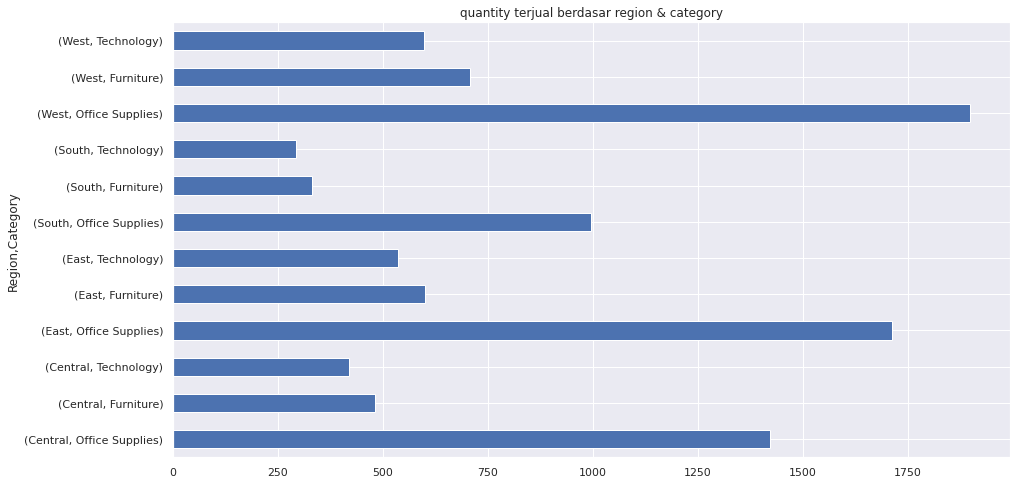

In [ ]:
df.groupby('Region')['Category'].value_counts().plot(kind='barh',title='quantity terjual berdasar region & category')

secara kasat mata, Region West memiliki pencapaian quantity penjualan terbanyak<br>
daripada Region yang lainnya

In [ ]:
df.columns

Index(['Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID', 'Customer_Name',
       'Segment', 'City', 'State', 'Postal_Code', 'Region', 'Product_ID',
       'Category', 'Sub_Category', 'Product_Name', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

In [ ]:
def to_integer(dt_time):
    return 10000*dt_time.year + 100*dt_time.month + dt_time.day

In [ ]:
import math 

In [ ]:
def category_date(category):
    category_1 = df[df['Category'] == category]
    
    order_date =  pd.to_datetime(category_1["Order_Date"])
    ship_date =  pd.to_datetime(category_1["Ship_Date"])

    order_date = list(map(to_integer, order_date))
    ship_date = list(map(to_integer, ship_date))

    difference = []
    for date1, date2 in zip(order_date, ship_date):
        difference.append(date2- date1)

    mean = sum(difference) // len(difference)
    maxi = max(difference)
    mini = min(difference)
    
    print("Mean of the Category {} {} ".format(category,mean))
    print("Maximum date of the Category {} {} ".format(category,maxi))
    print("Minimum date of the Category {} {} ".format(category,mini))
    print("\n")
    print("\n")
    
category_date('Technology')

category_date('Furniture')
category_date('Office Supplies')

Mean of the Category Technology 130 
Maximum date of the Category Technology 8876 
Minimum date of the Category Technology 0 




Mean of the Category Furniture 145 
Maximum date of the Category Furniture 8876 
Minimum date of the Category Furniture 0 




Mean of the Category Office Supplies 150 
Maximum date of the Category Office Supplies 8876 
Minimum date of the Category Office Supplies 0 






In [ ]:
def city_profit(category):
    category_1 = df[df['Category'] == category]
    category_1.groupby('City')['Profit'].sum().sort_values(ascending=False)[:5].plot(kind='bar',title="profit top 5 city by category {}".format(category))
    

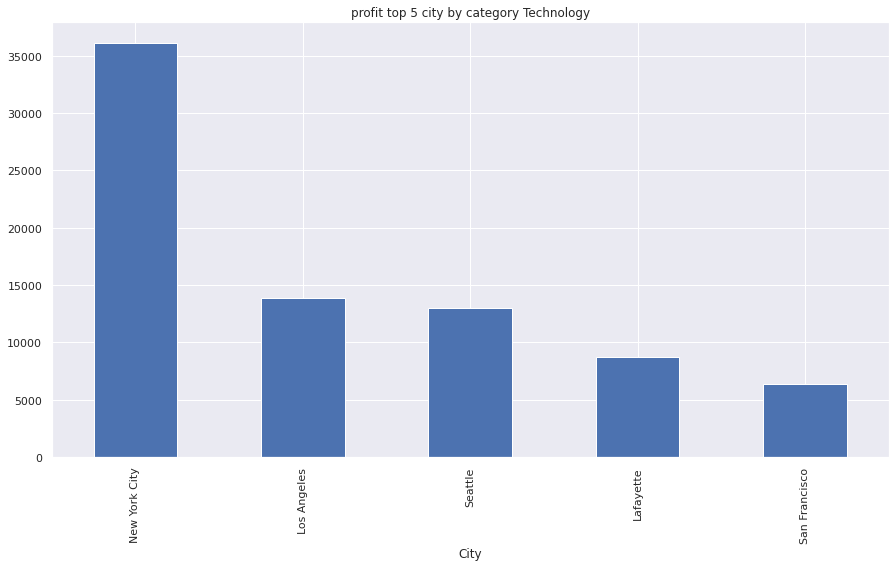

In [ ]:
city_profit('Technology')

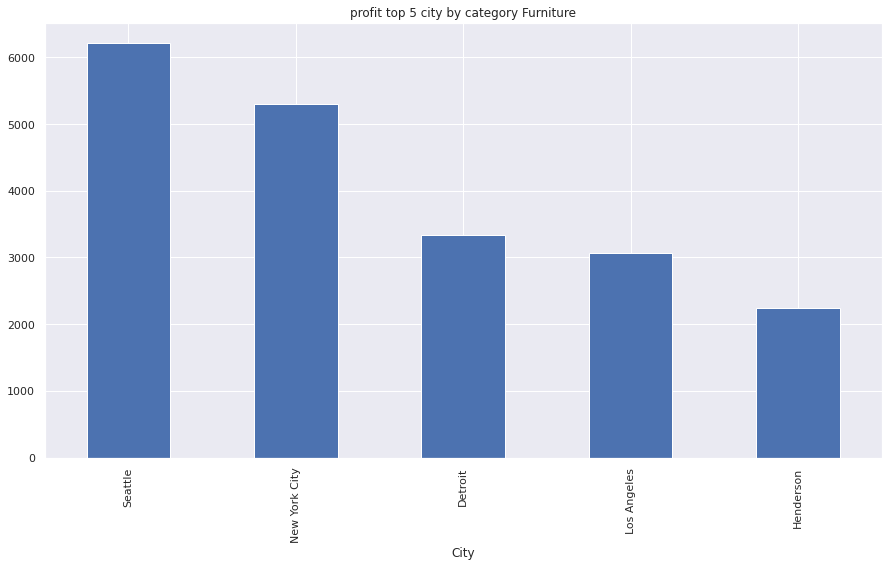

In [ ]:
city_profit('Furniture')

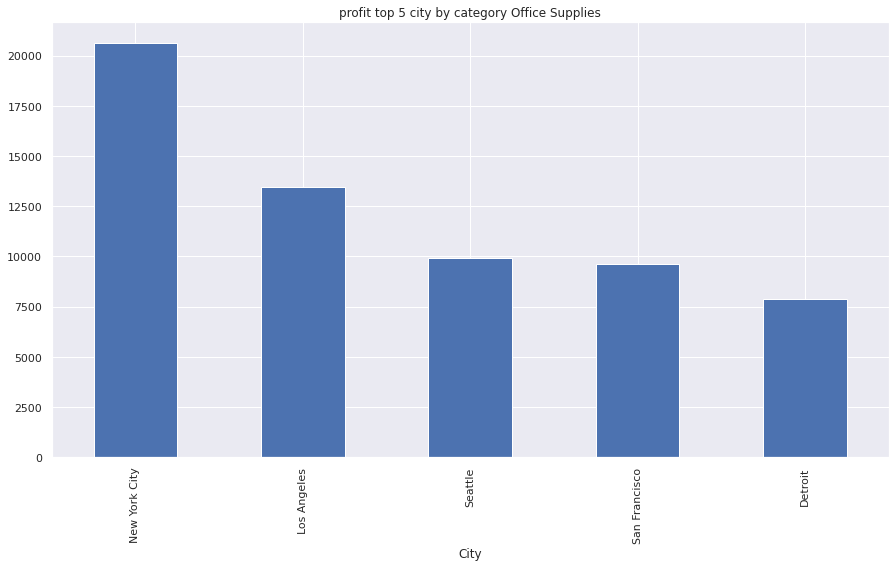

In [ ]:
city_profit('Office Supplies')

Text(0.5, 1.0, 'popular sub-category')

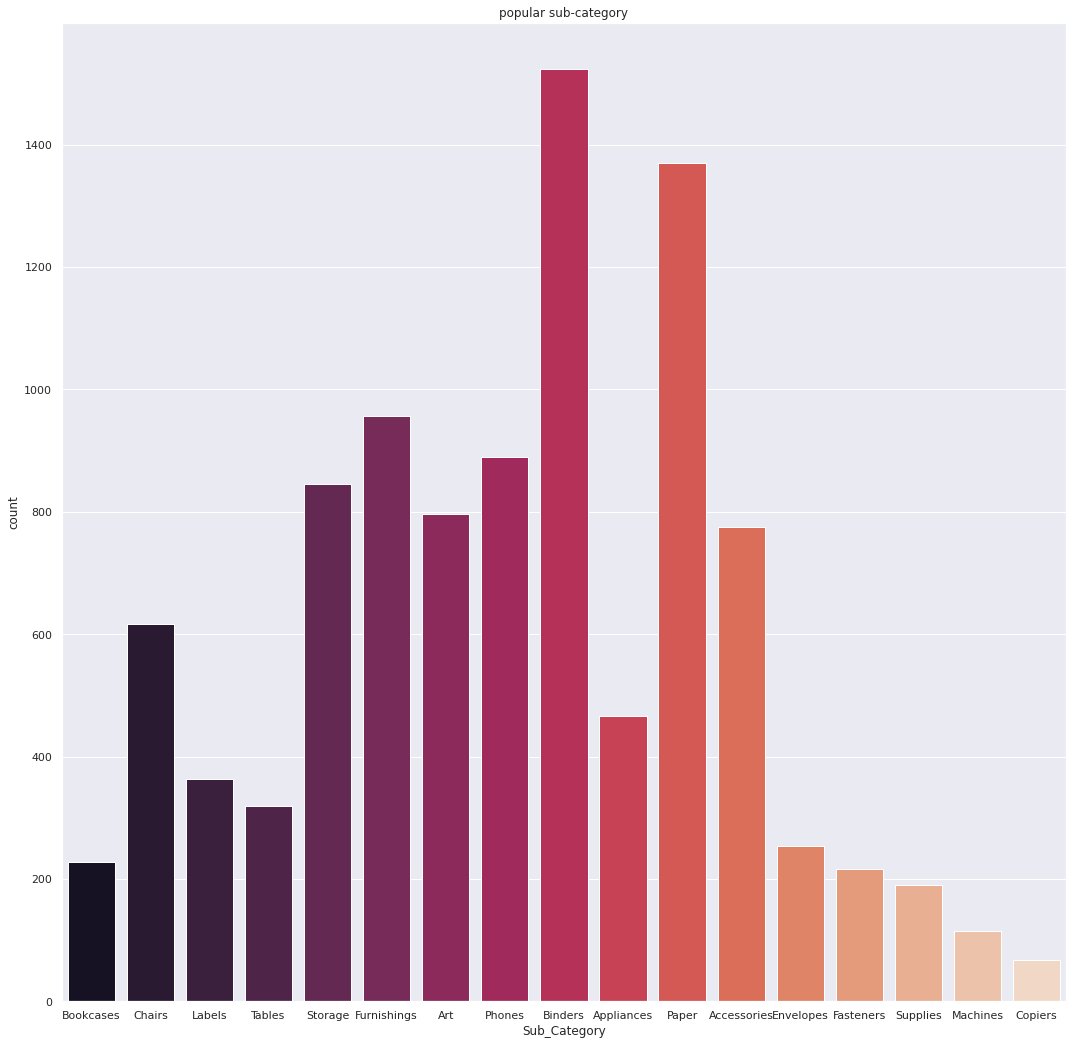

In [ ]:
plt.figure(figsize=(18,18))
sns.countplot(x=df['Sub_Category'],palette='rocket')
plt.title("popular sub-category")

terlihat bahwa Binders (Office Supplies) & Papers (Office Supplies) mendominasi pesanan (popular)

### visualisasi customer analysis

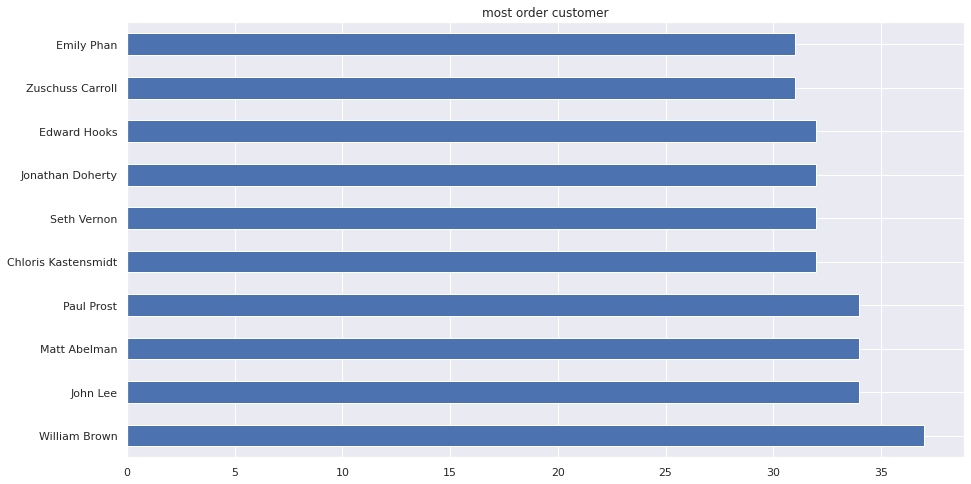

In [ ]:
df['Customer_Name'].value_counts()[:10].plot(kind='barh',title='most order customer')

In [ ]:
customers = list(df['Customer_Name'].value_counts()[:10].index)
filters = df['Customer_Name'].isin(customers)
A = df[filters]

In [ ]:
values = A.groupby('Customer_Name')['Profit'].sum()
values

Customer_Name
Chloris Kastensmidt     141.2831
Edward Hooks           1393.5154
Emily Phan              144.9578
John Lee                228.9070
Jonathan Doherty       1050.2668
Matt Abelman           1240.2266
Paul Prost             1495.0854
Seth Vernon            1199.4242
William Brown           714.3311
Zuschuss Carroll      -1032.1490
Name: Profit, dtype: float64

customer bernama Zuschuss Carrollmemiliki anomali, yaitu memiliki profit yang sedikit, <br>
sehingga sebaiknya kita take out dari dataset

In [ ]:
A = A[A['Customer_Name'] != 'Zuschuss Carroll']
print(customers)
del customers[-2]

['William Brown', 'John Lee', 'Matt Abelman', 'Paul Prost', 'Chloris Kastensmidt', 'Seth Vernon', 'Jonathan Doherty', 'Edward Hooks', 'Zuschuss Carroll', 'Emily Phan']


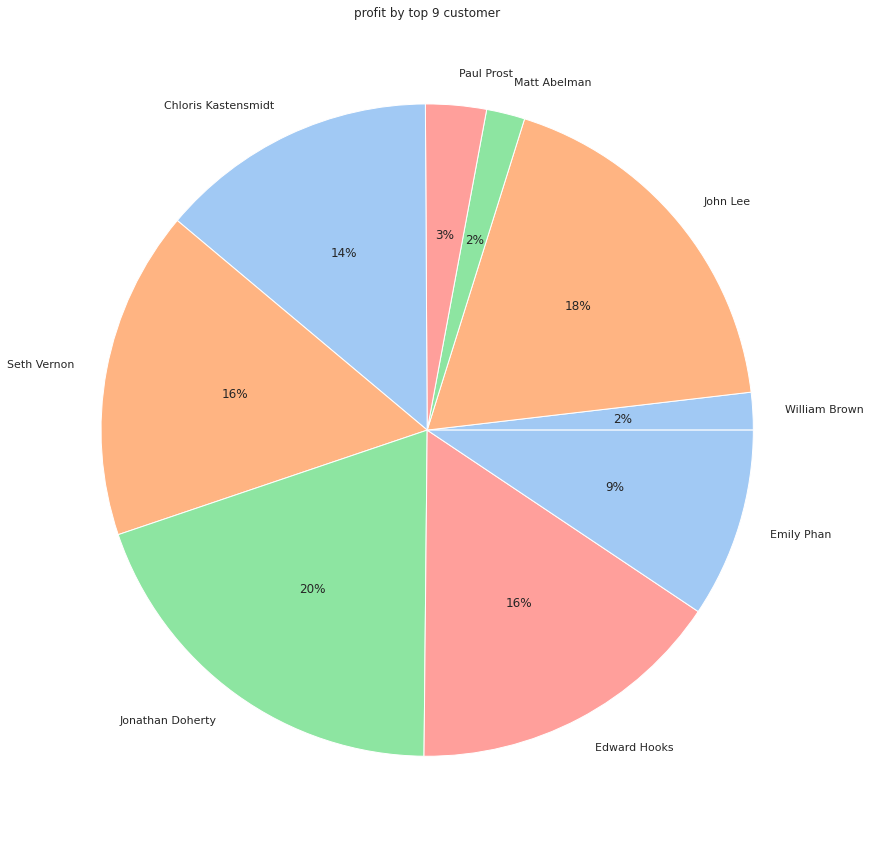

In [ ]:
plt.figure(figsize=(15,15))
values = A.groupby('Customer_Name')['Profit'].sum()

plt.pie(values, labels = customers, colors = colors, autopct='%.0f%%')
plt.title("profit by top 9 customer")
plt.show()

### daftar pustaka
1. https://www.kaggle.com/code/theyazilimci/eda-superstore-analysis-python